# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
weather_api_key

'1bce4c0df3b2293dfc66e783f97126f9'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [3]:
#URL and Units
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
query_url = weather_url + "appid=" + weather_api_key + "&q=" + city
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=1bce4c0df3b2293dfc66e783f97126f9&q=myitkyina'

In [18]:
example = cities[0]
test_url = query_url + example
test_response = requests.get (test_url).json()
from pprint import pprint
pprint(test_response)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 22.6783, 'lon': -3.9836},
 'dt': 1614441833,
 'id': 2450173,
 'main': {'feels_like': 78.58,
          'grnd_level': 993,
          'humidity': 12,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 85.35,
          'temp_max': 85.35,
          'temp_min': 85.35},
 'name': 'Taoudenni',
 'sys': {'country': 'ML', 'sunrise': 1614407945, 'sunset': 1614449913},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 239, 'speed': 4.47}}


In [19]:
cities_df = pd.DataFrame({"City": cities})
cities_df. head()

,City
0,taoudenni
1,punta arenas
2,camargo
3,nome
4,constitucion


In [49]:
# begin with Variables 
city_name = []
c_country = []
date =[]
c_lat =[]
c_lon =[]
temp_max =[]
humid =[]
cloud =[]
wind =[]
i = 1


print (f"Beginning Data Retrival")
print ("-------------------------")

for city in cities:
    city=city
    query_url = weather_url + "appid=" + weather_api_key + "&q=" + city
    w_json =requests.get(query_url).json()
    
    try:      
        city_name.append(w_json ["name"])
        c_country.append(w_json["sys"]["country"])
        date.append(w_json["dt"])
        c_lat.append(w_json["coord"]["lat"])
        c_lon.append(w_json ["coord"]["lon"])
        temp_max.append(w_json["main"]["temp_max"])
        humid.append(w_json ["main"]["humidity"])
        cloud.append(w_json ["clouds"]["all"])
        wind.append(w_json ["wind"]["speed"])
        city_info = w_json["name"]
        print(f"Processing record {i} | {city_info}")
        i+=1
    except (KeyError):
        print(f"City Not found, Skipping.....")
            
        
        


Beginning Data Retrival
-------------------------
Processing record 1 | Taoudenni
Processing record 2 | Punta Arenas
Processing record 3 | Camargo
Processing record 4 | Nome
Processing record 5 | Constitución
Processing record 6 | Dikson
Processing record 7 | Ust-Nera
Processing record 8 | Norsup
Processing record 9 | Ushuaia
Processing record 10 | Tual
Processing record 11 | Cape Town
Processing record 12 | Fairbanks
City Not found, Skipping.....
Processing record 13 | Saldanha
Processing record 14 | Kalininsk
City Not found, Skipping.....
Processing record 15 | Castro
Processing record 16 | Lethem
Processing record 17 | Longyearbyen
Processing record 18 | Butaritari
Processing record 19 | Xining
Processing record 20 | Laas
Processing record 21 | East London
Processing record 22 | Hobart
Processing record 23 | Hilo
Processing record 24 | New Norfolk
Processing record 25 | Sisimiut
City Not found, Skipping.....
Processing record 26 | Lata
City Not found, Skipping.....
Processing record

Processing record 229 | Kruisfontein
Processing record 230 | Kinel’-Cherkassy
Processing record 231 | Lahaina
Processing record 232 | Uruaçu
Processing record 233 | Tuatapere
Processing record 234 | Tambovka
Processing record 235 | Vilyuysk
Processing record 236 | Dunedin
City Not found, Skipping.....
Processing record 237 | Siocon
Processing record 238 | Bolobo
Processing record 239 | Ponta do Sol
Processing record 240 | Redcliffe
Processing record 241 | Rome
Processing record 242 | Tuy Hoa
Processing record 243 | Severo-Kuril'sk
Processing record 244 | Rock Springs
Processing record 245 | Araouane
Processing record 246 | Faanui
Processing record 247 | Kaitangata
Processing record 248 | Aswān
Processing record 249 | Likasi
Processing record 250 | Oussouye
Processing record 251 | Tasiilaq
City Not found, Skipping.....
Processing record 252 | Vila Franca do Campo
Processing record 253 | Lompoc
City Not found, Skipping.....
Processing record 254 | La Rioja
Processing record 255 | Sol'-Il

Processing record 462 | Grand-Lahou
Processing record 463 | Vardø
Processing record 464 | Akbarpur
Processing record 465 | Coahuayana Viejo
Processing record 466 | Srandakan
Processing record 467 | Yumen
Processing record 468 | Kalat
Processing record 469 | Verkhnedneprovskiy
Processing record 470 | Malia
Processing record 471 | Wenling
Processing record 472 | Balakhta
Processing record 473 | Ambon City
Processing record 474 | Noumea
Processing record 475 | Moultrie
Processing record 476 | Hambantota
Processing record 477 | Mēga
Processing record 478 | Grand Island
Processing record 479 | Tautira
Processing record 480 | Assiut
Processing record 481 | Gao
Processing record 482 | Huron
Processing record 483 | Salinópolis
Processing record 484 | Port Lincoln
Processing record 485 | Buraidah
Processing record 486 | Schroeder
Processing record 487 | Yazman
Processing record 488 | Ucluelet
Processing record 489 | Haifa
Processing record 490 | Tumbes
Processing record 491 | Portage
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [68]:
# Convert to Dataframe
weather_d= {'City Name': city_name,'Country': c_country,'Cloudiness': cloud,'Lat':c_lat,'Long':c_lon,'Humidity':humid,'Windspeed':wind,'Temperature':temp_max}
weather_df =pd.DataFrame(weather_d, columns=('City Name','Country','Cloudiness','Lat','Long','Humidity', 'Windspeed','Temperature'))
weather_df

,City Name,Country,Cloudiness,Lat,Long,Humidity,Windspeed,Temperature
0,Taoudenni,ML,0,22.6783,-3.9836,20,0.84,293.97
1,Punta Arenas,CL,0,-53.1500,-70.9167,31,6.69,297.15
2,Camargo,MX,100,27.6667,-105.1667,15,6.79,299.60
3,Nome,US,1,64.5011,-165.4064,64,3.09,250.15
4,Constitución,CL,7,-35.3333,-72.4167,53,7.55,294.59
...,...,...,...,...,...,...,...,...
548,Valparaíso,CL,20,-33.0393,-71.6273,72,3.09,293.15
549,Verkhniy Baskunchak,RU,100,48.2256,46.7217,94,6.05,275.71
550,Petropavlovsk-Kamchatskiy,RU,40,53.0452,158.6483,79,1.00,265.15
551,Pontal do Paraná,BR,75,-25.6533,-48.5128,83,4.63,296.15


In [69]:
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [70]:
test_humidity = weather_df["Humidity"].describe(include = "all")
print("No cities have over 100% humidity in data")
test_humidity

No cities have over 100% humidity in data


count    553.000000
mean      73.495479
std       20.373871
min        8.000000
25%       65.000000
50%       78.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [71]:
#  Get the indices of cities that have humidity over 100%.


In [72]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

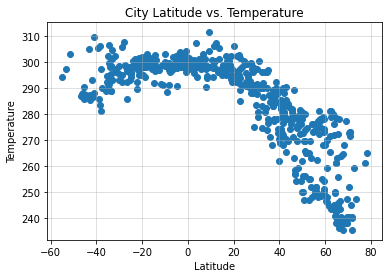

In [81]:
plt.scatter(weather_df["Lat"], weather_df["Temperature"])
plt.title(f"City Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(alpha = 0.5)
plt.savefig("output_data/Latitudevs.Temperature.png")
plt.show

          

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

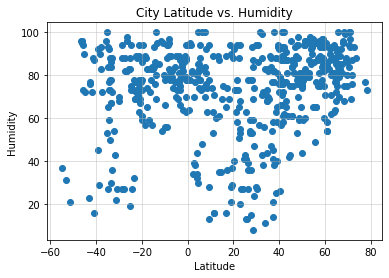

In [82]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])
plt.title(f"City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(alpha = 0.5)
plt.savefig("output_data/Latitudevshumidity.png")
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

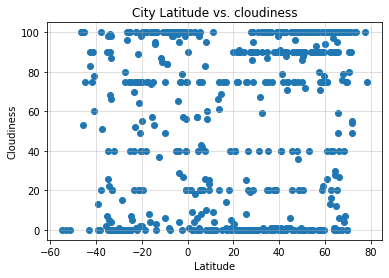

In [83]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])
plt.title(f"City Latitude vs. cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(alpha = 0.5)
plt.savefig("output_data/Latitudevscloud.png")
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

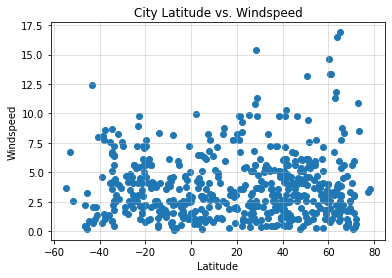

In [84]:
plt.scatter(weather_df["Lat"], weather_df["Windspeed"])
plt.title(f"City Latitude vs. Windspeed")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.grid(alpha = 0.5)
plt.savefig("output_data/Latitudevswind.png")
plt.show

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [92]:
northern=weather_df.loc[weather_df["Lat"] >= 0]
len(northern)


369

In [93]:
southern=weather_df.loc[weather_df["Lat"] < 0]
len(southern)


184

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression